<a href="https://colab.research.google.com/github/GUmarEla/Image_Processing/blob/main/05_ImageRestoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

**Affine transformaitons:**
*   translation(image, Tx, Ty)
*   scaling(image, a, b)
*   rotate(image, theta)

(theta is in  degree)

**Perspective Transformation**
*   perspective_transformation(image, H)

**Warping**
*   warping(image, transformation_type, matrix)

*-transformation_type: "affine" or "perspective".*

*-when working with "affine" matrices that we use in perspective transformation, in the case of using "perspective" use in (matrix) the ones we use in perspective transformation.*


###Import libraries

In [78]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Load images

In [79]:
# Import necessary libraries
import numpy as np
import requests
import cv2

# Define the image URL
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2N9OK2YKfUJp-zElKfTpuBbrUSfn1YFqp7A&s'

# Download the image
response = requests.get(url)
img_data = response.content

# Convert image data to a NumPy array
img_array = np.frombuffer(img_data, np.uint8)

# Decode the images
image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## **Affine transformation**




**Translation**

In [80]:
import numpy as np

def translation_channel(image, Tx, Ty):
  # Shape of input matrix
  hei, wid = image.shape

  # Result image
  image_result = np.zeros((image.shape), np.uint8)

  # Inverse matrix
  T = np.array([[1, 0, Tx],
                [0, 1, Ty],
                [0, 0, 1]])
  T_inv = np.linalg.inv(T)

  offset_i = max(0, -Tx)
  offset_j = max(0, -Ty)

  for i in range(hei):
    for j in range(wid):
        pixel_value = image[i, j]
        i_new, j_new, _ = np.dot(T_inv, [i, j, 1]).astype(int)
        i_new += offset_i
        j_new += offset_j

        if (0 <= i_new < hei) and (0 <= j_new < wid):
            image_result[i_new, j_new] = pixel_value

  return image_result

def translation(image, Tx, Ty):
  # applying to gray images
  if len(image.shape) == 2:
    return translation_channel(image, Tx, Ty)
  else:
    # splt /separate channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # applying the contrast to each channel
    new_r_channel = translation_channel(r_channel, Tx, Ty)
    new_g_channel = translation_channel(g_channel, Tx, Ty)
    new_b_channel = translation_channel(b_channel, Tx, Ty)

    # merge channels
    result_image = cv2.merge([new_r_channel, new_g_channel, new_b_channel])
  return result_image

(-0.5, 231.5, 216.5, -0.5)

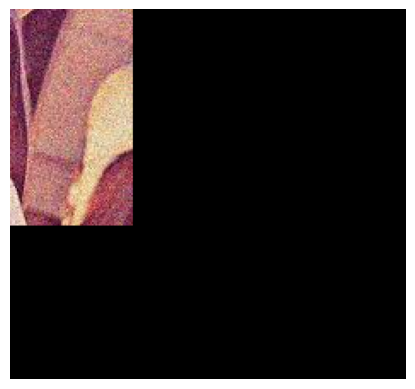

In [81]:
plt.imshow(translation(image_color, 90, 160))
plt.axis('off')

(-0.5, 231.5, 216.5, -0.5)

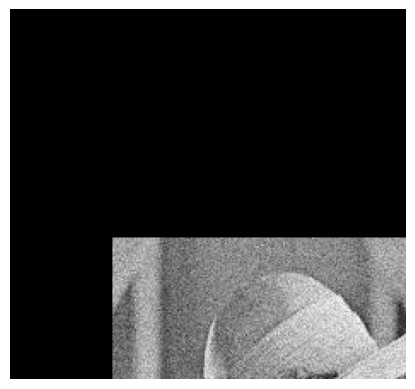

In [82]:
plt.imshow(translation(image_gray, -67, -30), cmap='gray')
plt.axis('off')

**Scaling**

In [85]:
import numpy as np

def scaling_channel(image, a, b):
  # shape of the image
  hei, wid = image.shape

  # shape the result image
  hei_new = round(hei * a)
  wid_new = round(wid * b)
  result_image = np.zeros((hei_new, wid_new), np.uint8)

  # Transformation matrix for scaling
  T = np.array([[a, 0, 0], [0, b, 0], [0, 0, 1]])
  T_inv = np.linalg.inv(T)

  for i_new in range(hei_new):
    for j_new in range(wid_new):
      # Map the new coordinates back to the original coordinates
      i_orig, j_orig, _ = np.dot(T_inv, [i_new, j_new, 1]).round().astype(int)

      if 0 <= i_orig < hei and 0 <= j_orig < wid:
        result_image[i_new, j_new] = image[i_orig, j_orig]

  return result_image

def scaling(image, a, b):
  # applying to gray images
  if len(image.shape) == 2:
    return scaling_channel(image, a, b)
  else:
    # splt /separate channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # applying the contrast to each channel
    new_r_channel = scaling_channel(r_channel, a, b)
    new_g_channel = scaling_channel(g_channel, a, b)
    new_b_channel = scaling_channel(b_channel, a, b)

    # merge channels
    result_image = cv2.merge([new_r_channel, new_g_channel, new_b_channel])
  return result_image

(-0.5, 1066.5, 325.5, -0.5)

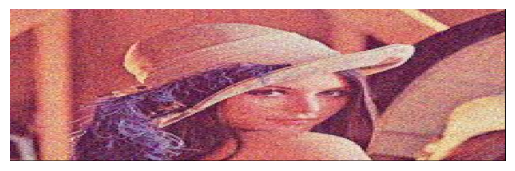

In [86]:
plt.imshow(scaling(image_color, 1.5, 4.6))
plt.axis('off')

(-0.5, 440.5, 867.5, -0.5)

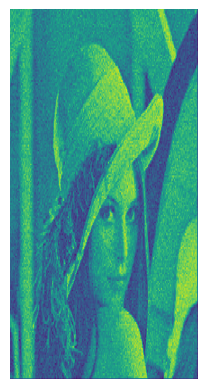

In [87]:
plt.imshow(scaling(image_gray, 4, 1.9))
plt.axis('off')

**Rotate**

In [88]:
import numpy as np

def rotate_channel(image, theta):
  # shape of the image
  hei, wid = image.shape

  # Calculate the center of the image
  cx, cy = hei // 2, wid // 2

  # shape the result image
  result_image = np.zeros((hei, wid), np.uint8)

  # Convert angle to radians
  theta = np.radians(theta)
  a, b = np.cos(theta), np.sin(theta)

  # Rotation matrix and its inverse
  T = np.array([[a, -b, 0],
                [b, a, 0],
                [0, 0, 1]])
  T_inv = np.linalg.inv(T)

  for i in range(hei):
    for j in range(wid):
      # Translate coordinates to the center
      i_centered = i - cx
      j_centered = j - cy

      # Use the inverse transformation to find the original coordinates
      i_orig, j_orig, _ = np.dot(T_inv, [i_centered, j_centered, 1])
      i_orig = round(i_orig + cx)
      j_orig = round(j_orig + cy)

      # Check if the original coordinates are within bounds
      if 0 <= i_orig < hei and 0 <= j_orig < wid:
        result_image[i, j] = image[i_orig, j_orig]

  return result_image

def rotate(image, theta):
  # applying to gray images
  if len(image.shape) == 2:
    return  rotate_channel(image, theta)
  else:
    # splt /separate channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # applying the contrast to each channel
    new_r_channel = rotate_channel(r_channel, theta)
    new_g_channel = rotate_channel(g_channel, theta)
    new_b_channel = rotate_channel(b_channel, theta)

    # merge channels
    result_image = cv2.merge([new_r_channel, new_g_channel, new_b_channel])
  return result_image

(-0.5, 231.5, 216.5, -0.5)

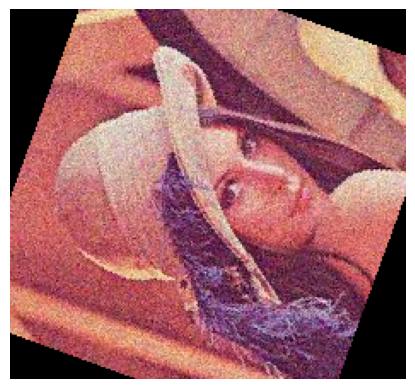

In [89]:
plt.imshow(rotate(image_color, 70))
plt.axis('off')

(-0.5, 231.5, 216.5, -0.5)

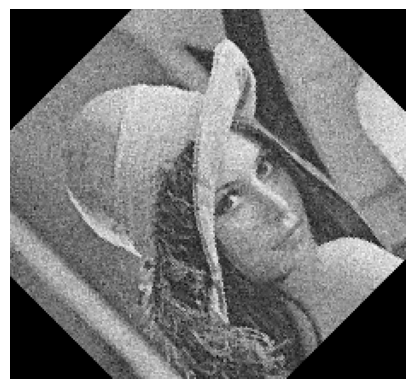

In [90]:
plt.imshow(rotate(image_gray, 45),cmap='gray')
plt.axis('off')

## **Perspective Transformation**

In [91]:
import numpy as np
from scipy.ndimage import map_coordinates

def perspective_transformation_channel(image, H):
  # Shape of the image
  hei, wid = image.shape

  # Resultant image initialized to zeros
  result_image = np.zeros_like(image)

  # Inverse of the transformation matrix
  H_inv = np.linalg.inv(H)

  for i in range(hei):
    for j in range(wid):
      # Apply the inverse transformation
      [i_new, j_new, k_new] = np.dot(H_inv, [i, j, 1])

      # Normalize the coordinates
      i_new /= k_new
      j_new /= k_new

      # Check if the new coordinates are within the image bounds
      if 0 <= i_new < hei and 0 <= j_new < wid:
        # Interpolate the pixel value for smoother transformation
        result_image[i, j] = map_coordinates(image, [[i_new], [j_new]], order=1, mode='nearest')

  return result_image

def perspective_transformation(image, H):
  # applying to gray images
  if len(image.shape) == 2:
    return  perspective_transformation_channel(image, H)
  else:
    # splt /separate channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # applying the contrast to each channel
    new_r_channel = perspective_transformation_channel(r_channel, H)
    new_g_channel = perspective_transformation_channel(g_channel, H)
    new_b_channel = perspective_transformation_channel(b_channel, H)

    # merge channels
    result_image = cv2.merge([new_r_channel, new_g_channel, new_b_channel])
  return result_image

In [92]:
H_perspective = np.array([
    [1.2, 0.2, 100],
    [0.1, 1.5, 50],
    [0.001, 0.002, 1]
])

<ipython-input-91-907e7e8ba3c2>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result_image[i, j] = map_coordinates(image, [[i_new], [j_new]], order=1, mode='nearest')


(-0.5, 231.5, 216.5, -0.5)

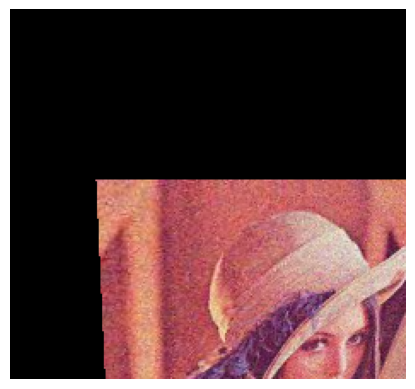

In [93]:
plt.imshow(perspective_transformation(image_color, H_perspective))
plt.axis(False)

<ipython-input-91-907e7e8ba3c2>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result_image[i, j] = map_coordinates(image, [[i_new], [j_new]], order=1, mode='nearest')


(-0.5, 231.5, 216.5, -0.5)

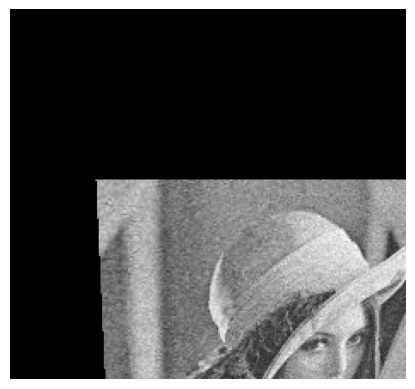

In [94]:
plt.imshow(perspective_transformation(image_gray, H_perspective),
           cmap='gray')
plt.axis(False)

## Warping

In [95]:
import numpy as np

def nearest_neighbor(image_orig, i, j):
  # Round to nearest integer coordinates
  i = int(round(i))
  j = int(round(j))

  # Ensure indices are within bounds
  i = max(0, min(i, image_orig.shape[0] - 1))
  j = max(0, min(j, image_orig.shape[1] - 1))

  return image_orig[i, j]

def warping_channel(image, transformation_type, matrix):
  # Shape of input image
  hei, wid = image.shape

  # Initialize result (output) image
  result_image = np.zeros((hei, wid), np.uint8)

  # Inverse of the transformation matrix
  mat_inv = np.linalg.inv(matrix)

  if transformation_type == 'perspective':
    for i_new in range(hei):
      for j_new in range(wid):
        # Map the new coordinates back to the original coordinates
        i_orig, j_orig, k_orig = np.dot(mat_inv, [i_new, j_new, 1])
        i_orig /= k_orig
        j_orig /= k_orig

        # Check if the original coordinates are within the bounds of the source image
        if 0 <= i_orig < hei and 0 <= j_orig < wid:
            result_image[i_new, j_new] = nearest_neighbor(image, i_orig, j_orig)

  else:
    for i_new in range(hei):
      for j_new in range(wid):
        # Map the new coordinates back to the original coordinates
        i_orig, j_orig, _ = np.dot(mat_inv, [i_new, j_new, 1])

        # Check if the original coordinates are within the bounds of the source image
        if 0 <= i_orig < hei and 0 <= j_orig < wid:
          result_image[i_new, j_new] = nearest_neighbor(image, i_orig, j_orig)

  return result_image

def warping(image, transformation_type, matrix):
  # applying to gray images
  if len(image.shape) == 2:
    return warping_channel(image, transformation_type, matrix)
  else:
    # splt /separate channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # applying the contrast to each channel
    new_r_channel = warping_channel(r_channel, transformation_type, matrix)
    new_g_channel = warping_channel(g_channel, transformation_type, matrix)
    new_b_channel = warping_channel(b_channel, transformation_type, matrix)

    # merge channels
    result_image = cv2.merge([new_r_channel, new_g_channel, new_b_channel])
  return result_image

**Matrices to use in warping function example**

In [96]:
import numpy as np
# Rotation by 30 degrees and translation
theta = np.radians(30)
cos_theta, sin_theta = np.cos(theta), np.sin(theta)
T = np.array([
    [1, 0.2, 50],  # Horizontal scaling, shearing, and translation
    [0.2, 1, 30],  # Vertical scaling, shearing, and translation
    [0, 0, 1]])     # Homogeneous coordinate for affine transformations

T1 = np.array([
    [cos_theta, -sin_theta, 50],  # Rotate and translate right by 50 pixels
    [sin_theta, cos_theta, 30],   # Rotate and translate down by 30 pixels
    [0, 0, 1]])

T2 = np.array([
    [1.5, 0.5, 0],  # Scale by 1.5 in x, shear in x by 0.5
    [0.0, 0.8, 0],  # Scale by 0.8 in y
    [0, 0, 1]])

T3 = np.array([
    [-1, 0, 0],    # Reflect across y-axis
    [0, 1, -100],  # Translate up by 100 pixels
    [0, 0, 1]])

#################################
H = np.array([
    [1, 0.2, 50],  # Horizontal scaling, shearing, and translation
    [0.2, 1, 30],  # Vertical scaling, shearing, and translation
    [0.001, 0.002, 1]])  # Perspective distortion

H1 = np.array([
    [1, 0.2, 0],   # Slight tilt along the x-axis
    [0.2, 1, 0],   # Slight tilt along the y-axis
    [0.001, 0.001, 1]])  # Perspective distortion

H2 = np.array([
    [1, 0.5, 0],   # Skew along the x-axis
    [0.3, 1, 0],   # Skew along the y-axis
    [0.002, 0.001, 1]])  # Perspective distortion

H3 = np.array([
    [1.5, 0.3, 0],   # Stretch along the x-axis and slight skew
    [0.1, 1, 0],     # Slight skew along the y-axis
    [0.001, 0.002, 1]])  # Perspective distortion

(-0.5, 231.5, 216.5, -0.5)

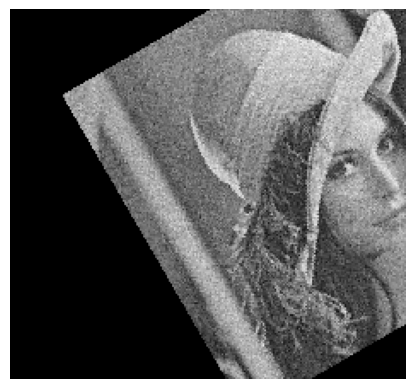

In [97]:
plt.imshow(warping(image_gray, "affine", T1),
           cmap='gray')
plt.axis('off')

(-0.5, 231.5, 216.5, -0.5)

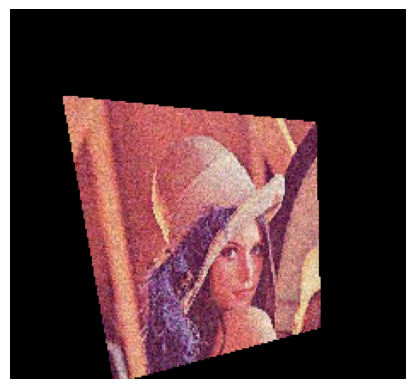

In [98]:
plt.imshow(warping(image_color, "perspective", H))
plt.axis('off')